### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from scipy.stats import shapiro
from sklearn.ensemble import RandomForestClassifier

### Import data

In [2]:
data = pd.read_csv('BankChurners.csv')
df = data[data.columns[:-2]] #ignore last two columns
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
def missing_values(data):
    variable_name=[]
    total_value=[]
    total_missing_value=[]
    missing_value_rate=[]
    unique_value_list=[]
    total_unique_value=[]
    data_type=[]
    for col in data.columns:
        variable_name.append(col)
        data_type.append(data[col].dtype)
        total_value.append(data[col].shape[0])
        total_missing_value.append(data[col].isnull().sum())
        missing_value_rate.append(round(data[col].isnull().sum()/data[col].shape[0],3))
        unique_value_list.append(data[col].unique())
        total_unique_value.append(len(data[col].unique()))
    missing_data=pd.DataFrame({"Variable":variable_name,"Total_Value":total_value,\
                             "Total_Missing_Value":total_missing_value,"Missing_Value_Rate":missing_value_rate,
                             "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value})
    return missing_data.sort_values("Missing_Value_Rate",ascending=False)
                            

In [4]:
missing_values(df)

,Variable,Total_Value,Total_Missing_Value,Missing_Value_Rate,Data_Type,Unique_Value,Total_Unique_Value
0,CLIENTNUM,10127,0,0.0,int64,"[768805383, 818770008, 713982108, 769911858, 7...",10127
11,Months_Inactive_12_mon,10127,0,0.0,int64,"[1, 4, 2, 3, 6, 0, 5]",7
19,Total_Ct_Chng_Q4_Q1,10127,0,0.0,float64,"[1.625, 3.714, 2.333, 2.5, 0.846, 0.722, 0.714...",830
18,Total_Trans_Ct,10127,0,0.0,int64,"[42, 33, 20, 28, 24, 31, 36, 32, 26, 17, 29, 2...",126
17,Total_Trans_Amt,10127,0,0.0,int64,"[1144, 1291, 1887, 1171, 816, 1088, 1330, 1538...",5033
16,Total_Amt_Chng_Q4_Q1,10127,0,0.0,float64,"[1.335, 1.541, 2.594, 1.405, 2.175, 1.376, 1.9...",1158
15,Avg_Open_To_Buy,10127,0,0.0,float64,"[11914.0, 7392.0, 3418.0, 796.0, 4716.0, 2763....",6813
14,Total_Revolving_Bal,10127,0,0.0,int64,"[777, 864, 0, 2517, 1247, 2264, 1396, 1677, 14...",1974
13,Credit_Limit,10127,0,0.0,float64,"[12691.0, 8256.0, 3418.0, 3313.0, 4716.0, 4010...",6205
12,Contacts_Count_12_mon,10127,0,0.0,int64,"[3, 2, 0, 1, 4, 5, 6]",7


In [5]:
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [32]:
df['Income_Category'].replace({'$60K - $80K': "60k_80k", 'Less than $40K': "0_40k", '$80K - $120K': "80k_120k",
                                        '$40K - $60K': "40k_60k", "$120K +": "120k_plus"}, inplace = True)
df.drop("CLIENTNUM", axis = 1, inplace = True)

In [33]:
df['Income_Category'].unique()

array(['40k_60k', '80k_120k', '120k_plus', '0_40k', 'Unknown', '60k_80k'],
      dtype=object)

### Visualizaiton

In [8]:
df.groupby("Attrition_Flag").size()

Attrition_Flag
Attrited Customer    1627
Existing Customer    8500
dtype: int64

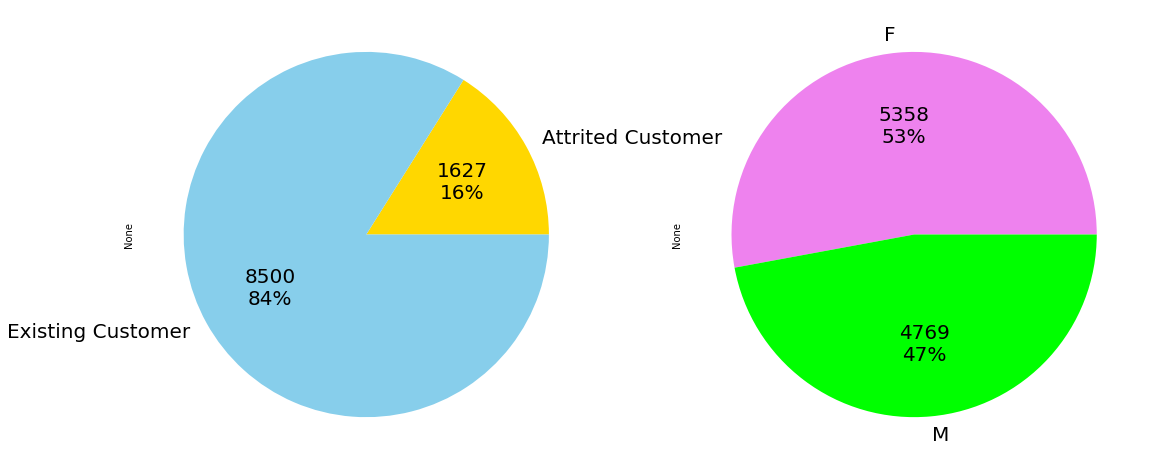

In [9]:
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 10))
df.groupby("Attrition_Flag").size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['gold', 'skyblue'],ax=ax1)

df.groupby("Gender").size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['violet', 'lime'],ax=ax2)

Text(0.5, 1.0, 'CARD CATEGORY & ATTRITION FLAG')

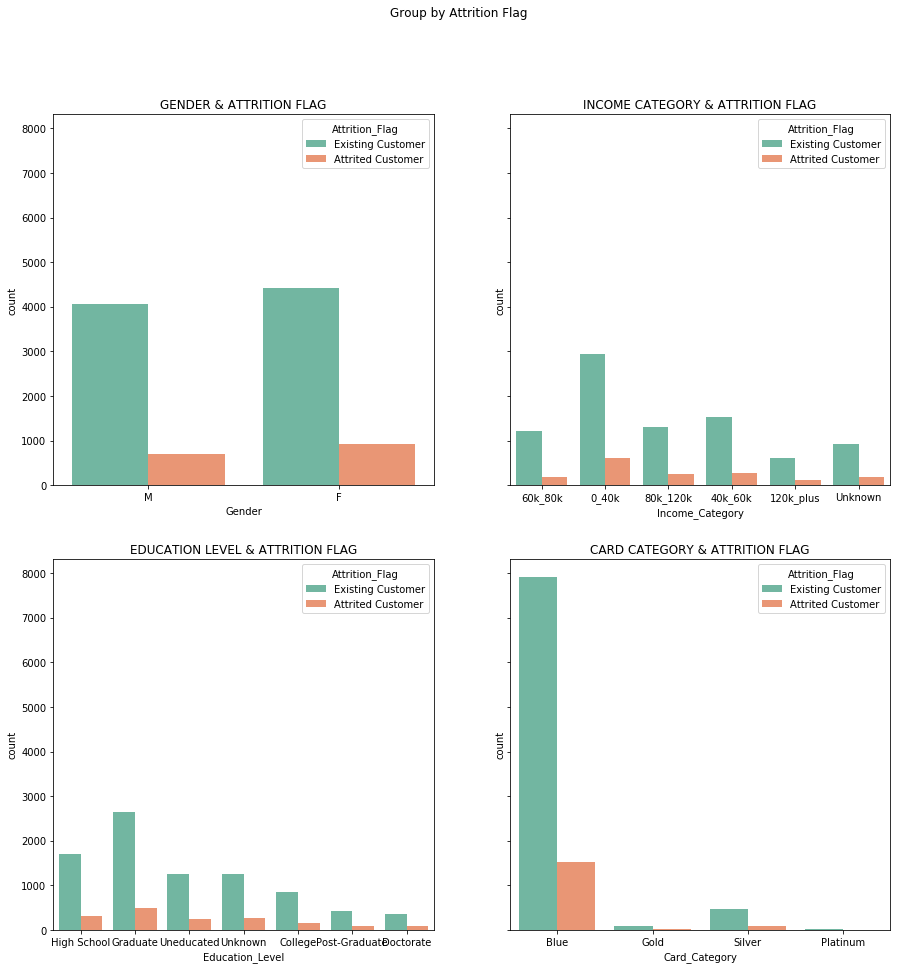

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharey=True)
fig.suptitle('Group by Attrition Flag')
sns.countplot(x="Gender", hue = "Attrition_Flag",  data=df, ax=axes[0,0], palette="Set2")
axes[0,0].set_title("GENDER & ATTRITION FLAG")

sns.countplot(x="Income_Category", hue = "Attrition_Flag",  data=df, ax=axes[0,1], palette="Set2")
axes[0,1].set_title("INCOME CATEGORY & ATTRITION FLAG")

sns.countplot(x="Education_Level", hue = "Attrition_Flag",  data=df, ax=axes[1,0], palette="Set2")
axes[1,0].set_title("EDUCATION LEVEL & ATTRITION FLAG")

sns.countplot(x="Card_Category", hue = "Attrition_Flag",  data=df, ax=axes[1,1], palette="Set2")
axes[1,1].set_title("CARD CATEGORY & ATTRITION FLAG")


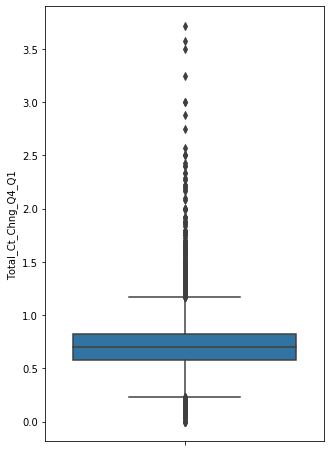

In [11]:
fig = plt.subplots(figsize = (5,8))
sns.boxplot(y=df["Total_Ct_Chng_Q4_Q1"])

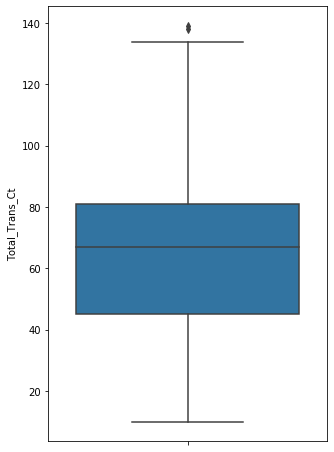

In [12]:
fig = plt.subplots(figsize = (5,8))
sns.boxplot(y=df["Total_Trans_Ct"])

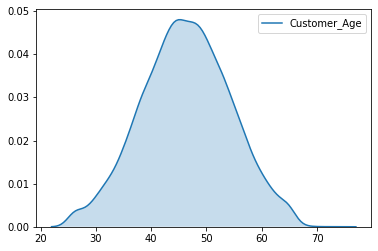

In [13]:
sns.kdeplot(df['Customer_Age'], shade = True)

### Outlier cleanup

In [14]:
columns = ["Customer_Age", 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
for column_name in columns:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column_name] < (Q1 - 3 * IQR)) |(df[column_name] > (Q3 + 3 * IQR)))]

In [15]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
5,Existing Customer,44,M,2,Graduate,Married,40k_60k,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
9,Existing Customer,48,M,2,Graduate,Single,80k_120k,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144
10,Existing Customer,42,M,5,Uneducated,Unknown,120k_plus,Blue,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
11,Existing Customer,65,M,1,Unknown,Married,40k_60k,Blue,54,6,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174
14,Existing Customer,57,F,2,Graduate,Married,0_40k,Blue,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,47,4,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172
10123,Attrited Customer,41,M,2,Unknown,Divorced,40k_60k,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,0_40k,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,40k_60k,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


There were 10127 row observations before outlier cleanup. We currently have 9240 number of row

### Normality test

In [16]:
def shapiro_wilk_test(data):
    columns = df.columns
    int_columns = []
    normality_column_name = []
    normality_statistic = []
    normality_result = []
    for column_type in columns:
        if df[column_type].dtypes == "int64" or df[column_type].dtypes == "float64":
            int_columns.append(column_type)
    for column in int_columns:
        stat, p = shapiro(data[column])
        statistic = ('Statistics=%.3f, p=%.3f' % (stat, p))
        #print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            normality_column_name.append(column)
            normality_statistic.append(statistic)
            normality.append("Sample looks Gaussian")
                    
        else:
            normality_column_name.append(column)
            normality_statistic.append(statistic)
            normality_result.append("Sample does not look Gaussian")
        
    normality_column_name = pd.DataFrame(normality_column_name, columns =['Column Name'])
    normality_statistic = pd.DataFrame(normality_statistic, columns =['Statistic']) 
    normality_result = pd.DataFrame(normality_result, columns =['Result']) 


    result = pd.concat([normality_column_name, normality_statistic, normality_result], axis=1, sort=False)
    
    return result 

In [17]:
shapiro_wilk_test(df)

C:\Users\Shaokat\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,Column Name,Statistic,Result
0,Customer_Age,"Statistics=0.996, p=0.000",Sample does not look Gaussian
1,Dependent_count,"Statistics=0.937, p=0.000",Sample does not look Gaussian
2,Months_on_book,"Statistics=0.977, p=0.000",Sample does not look Gaussian
3,Total_Relationship_Count,"Statistics=0.918, p=0.000",Sample does not look Gaussian
4,Months_Inactive_12_mon,"Statistics=0.870, p=0.000",Sample does not look Gaussian
5,Contacts_Count_12_mon,"Statistics=0.929, p=0.000",Sample does not look Gaussian
6,Credit_Limit,"Statistics=0.729, p=0.000",Sample does not look Gaussian
7,Total_Revolving_Bal,"Statistics=0.913, p=0.000",Sample does not look Gaussian
8,Avg_Open_To_Buy,"Statistics=0.731, p=0.000",Sample does not look Gaussian
9,Total_Amt_Chng_Q4_Q1,"Statistics=0.977, p=0.000",Sample does not look Gaussian


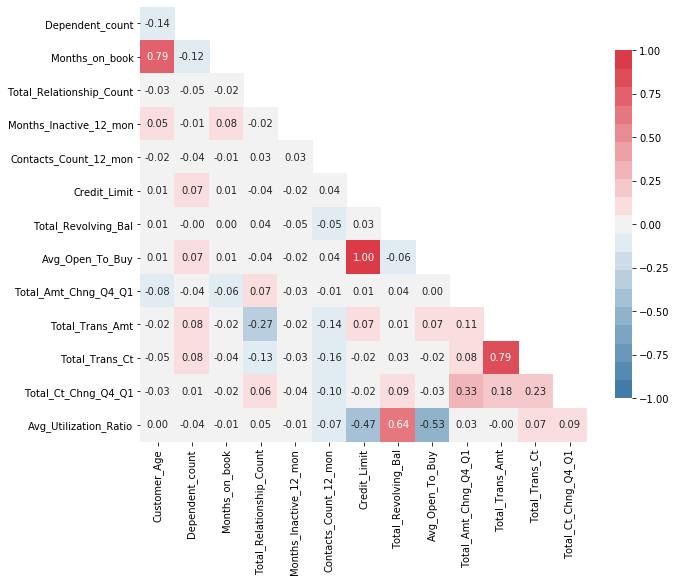

In [18]:
df_corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

sns.heatmap(corr, mask = mask, annot = True, fmt = '.2f', cmap = sns.diverging_palette(240,10, n= 19),
           vmin = -1, vmax = 1, cbar_kws = {'shrink': .8})


In [19]:
df_corr

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.000000,-0.136004,0.788916,-0.025209,0.054938,-0.022454,0.008354,0.014385,0.007006,-0.080757,-0.018256,-0.051479,-0.025104,0.002194
Dependent_count,-0.136004,1.000000,-0.116469,-0.051141,-0.007906,-0.041424,0.069494,-0.002393,0.069625,-0.035880,0.078436,0.076306,0.013852,-0.036508
Months_on_book,0.788916,-0.116469,1.000000,-0.019537,0.076159,-0.011446,0.011240,0.002865,0.010959,-0.061267,-0.019701,-0.041257,-0.023517,-0.012252
Total_Relationship_Count,-0.025209,-0.051141,-0.019537,1.000000,-0.015326,0.029892,-0.035763,0.035234,-0.038989,0.066629,-0.267749,-0.128152,0.058001,0.048557
Months_Inactive_12_mon,0.054938,-0.007906,0.076159,-0.015326,1.000000,0.033364,-0.020138,-0.045842,-0.015852,-0.029241,-0.015162,-0.031610,-0.044142,-0.011994
Contacts_Count_12_mon,-0.022454,-0.041424,-0.011446,0.029892,0.033364,1.000000,0.036209,-0.054595,0.041233,-0.014624,-0.135434,-0.157873,-0.098018,-0.066467
Credit_Limit,0.008354,0.069494,0.011240,-0.035763,-0.020138,0.036209,1.000000,0.032231,0.995679,0.008470,0.072255,-0.015078,-0.024969,-0.472568
Total_Revolving_Bal,0.014385,-0.002393,0.002865,0.035234,-0.045842,-0.054595,0.032231,1.000000,-0.060719,0.042856,0.013125,0.030587,0.086461,0.641690
Avg_Open_To_Buy,0.007006,0.069625,0.010959,-0.038989,-0.015852,0.041233,0.995679,-0.060719,1.000000,0.004477,0.070939,-0.017900,-0.032969,-0.531558
Total_Amt_Chng_Q4_Q1,-0.080757,-0.035880,-0.061267,0.066629,-0.029241,-0.014624,0.008470,0.042856,0.004477,1.000000,0.108867,0.076133,0.326643,0.030932



There is high correlation between Avg Open To buy and Credit Limit

Credit_Limit = Credit Limit on the Credit Card

Avg_Open_To_Buy = Open to Buy Credit Line (Average of last 12 months)


#### Remove 'Credit LImit' 

In [20]:
df.drop('Credit_Limit', axis = 1, inplace = True)

In [21]:
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer':0})

In [22]:
df_dummies = pd.get_dummies(df)
df_dummies

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_0_40k,Income_Category_120k_plus,Income_Category_40k_60k,Income_Category_60k_80k,Income_Category_80k_120k,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
5,0,44,2,36,3,1,2,1247,2763.0,1.376,...,0,0,1,0,0,0,1,0,0,0
9,0,48,2,36,6,3,3,1677,9979.0,1.524,...,0,0,0,0,1,0,1,0,0,0
10,0,42,5,31,5,3,2,1467,5281.0,0.831,...,0,1,0,0,0,0,1,0,0,0
11,0,65,1,54,6,2,3,1587,7508.0,1.433,...,0,0,1,0,0,0,1,0,0,0
14,0,57,2,48,5,2,2,680,1756.0,1.190,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,1,55,3,47,4,3,3,2517,12140.0,0.166,...,0,0,0,0,0,1,1,0,0,0
10123,1,41,2,25,4,2,3,2186,2091.0,0.804,...,0,0,1,0,0,0,1,0,0,0
10124,1,44,1,36,5,3,4,0,5409.0,0.819,...,1,0,0,0,0,0,1,0,0,0
10125,1,30,2,36,4,3,3,0,5281.0,0.535,...,0,0,1,0,0,0,1,0,0,0


### Train - Validation - Test Split

In [23]:
X = df_dummies.drop('Attrition_Flag', axis = 1)
Y = df_dummies['Attrition_Flag']

In [24]:
X.shape

(9240, 36)

In [25]:
Y.shape

(9240,)

In [26]:
#Train - Test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

#Train - Validation split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 42)

x_train_shape = X_train.shape
x_val_shape = X_val.shape
x_test_shape = X_test.shape

print(f"X_train shape = {x_train_shape} \nX_val shape = {x_val_shape}\nX_test shape = {x_test_shape}")

X_train shape = (5544, 36) 
X_val shape = (1848, 36)
X_test shape = (1848, 36)


In [27]:
unique, counts = np.unique(Y_val, return_counts=True)
dict(zip(unique, counts))

{0: 1512, 1: 336}

In [28]:
modelResult = []
modelName = []

def conf_matrx(y_test, y_pred, model):
    
    cm = confusion_matrix(y_test,y_pred)
    f, ax = plt.subplots(figsize = (5,5))
    sns.heatmap(cm, annot=True, linewidths=0.5, linecolor='red',fmt = '.0f', ax=ax)
    plt.xlabel('predicted y values')
    plt.ylabel('real y values')
    plt.title('\nConfusion Mtrix')
def  ML_Algorithms(model, alg_name, x_trainn,  x_vall, y_trainn, y_testt):
        from sklearn.metrics import roc_auc_score, roc_curve
        
        modell = model()
        result_model = modell.fit(x_trainn, y_trainn)
        y_pred = result_model.predict(x_vall)
        conf_matrx(y_testt, y_pred, alg_name)
        print('*****', alg_name, " ALGORITHM:")
        
        modelResult.append(result_model)
        modelName.append(alg_name)
        
        print("classification_report\n", classification_report(y_testt, y_pred))
        print('Accuracy Score for ', alg_name, accuracy_score(y_testt, y_pred))
        
        y_probs = modell.predict_proba(x_vall)[:,1] # positive class prediction probabilities  
        y_pred = np.where(y_probs > 0.5, 1, 0)
        
        
        
        

***** Random Forest Classifier  ALGORITHM:
classification_report
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1512
           1       0.94      0.82      0.88       336

    accuracy                           0.96      1848
   macro avg       0.95      0.91      0.93      1848
weighted avg       0.96      0.96      0.96      1848

Accuracy Score for  Random Forest Classifier 0.9588744588744589


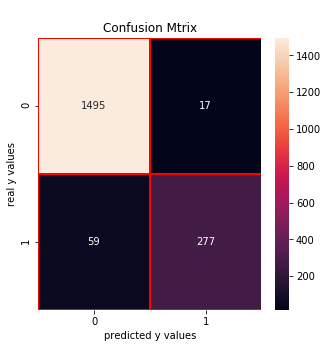

In [30]:
ML_Algorithms(RandomForestClassifier, "Random Forest Classifier", X_train, X_val, Y_train, Y_val)